## Shrushti Singhania
## 19BCE1566
## DA-2 : MULTIVARIATE DATA ANALYSIS

### Importing the libraries

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)
import os


### Reading Data

In [48]:
data=pd.read_csv("Wine.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
X = data.loc[:, "V2":] 
y = data.V1 
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      177 non-null    int64  
 1   V2      177 non-null    float64
 2   V3      177 non-null    float64
 3   V4      177 non-null    float64
 4   V5      177 non-null    float64
 5   V6      177 non-null    int64  
 6   V7      177 non-null    float64
 7   V8      177 non-null    float64
 8   V9      177 non-null    float64
 9   V10     177 non-null    float64
 10  V11     177 non-null    float64
 11  V12     177 non-null    float64
 12  V13     177 non-null    float64
 13  V14     177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


## Plotting Multivariate Data

### Matrix Scatterplot

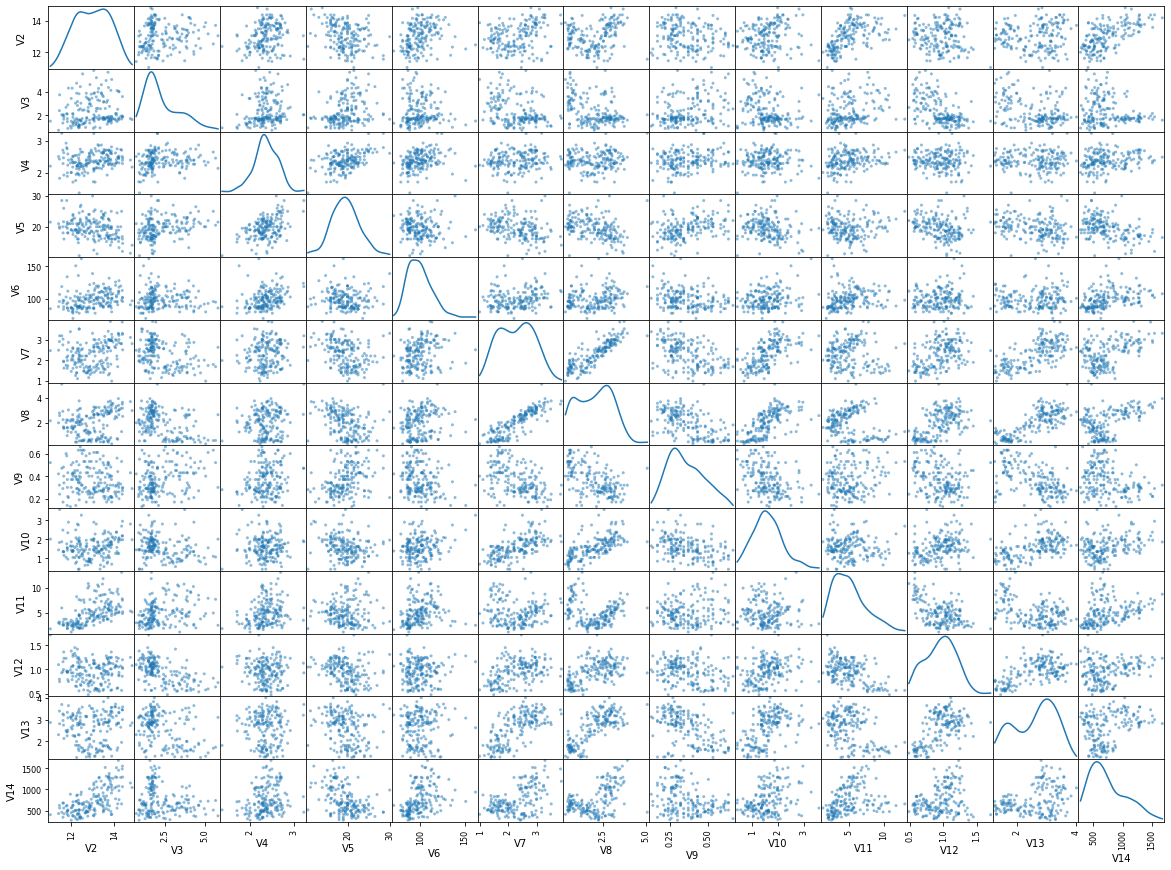

In [50]:
pd.plotting.scatter_matrix(data.loc[:, "V2":"V14"], diagonal="kde",figsize=(20,15))
plt.show()

### Scatterplot with the Data Points Labelled by their Group

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

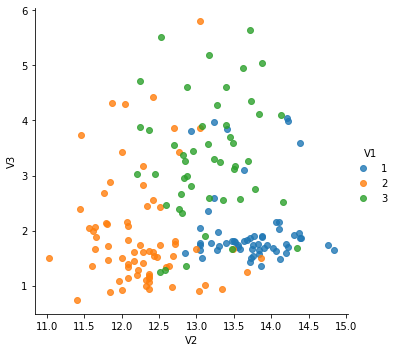

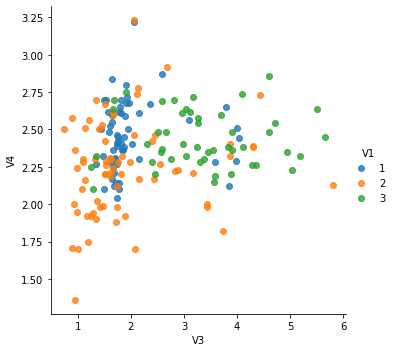

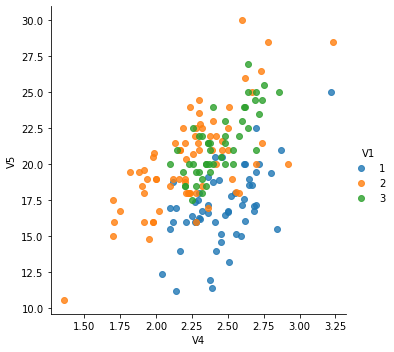

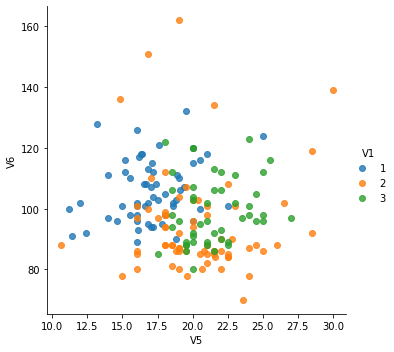

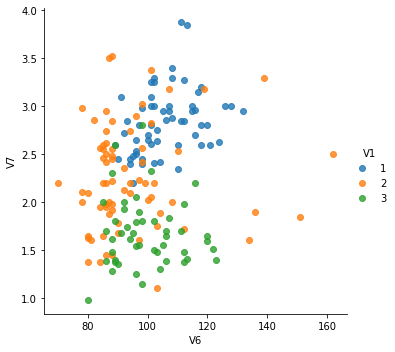

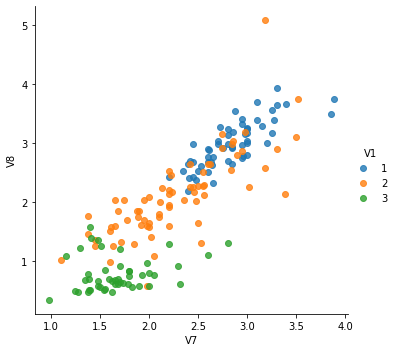

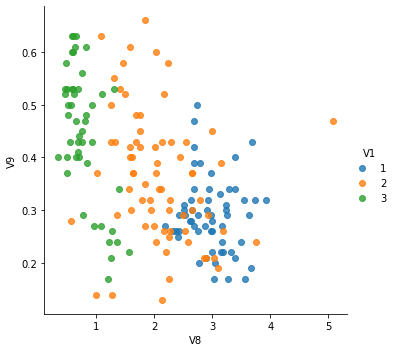

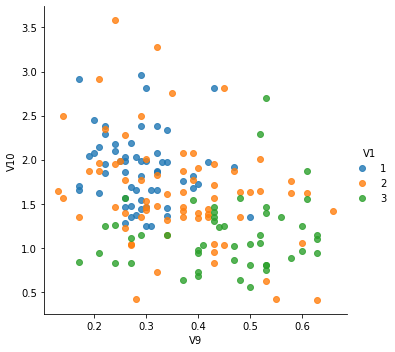

In [51]:
for i in range(2,10):
    sns.lmplot("V"+str(i), "V"+str(i+1), data, hue="V1", fit_reg=False);

### Profile Plot


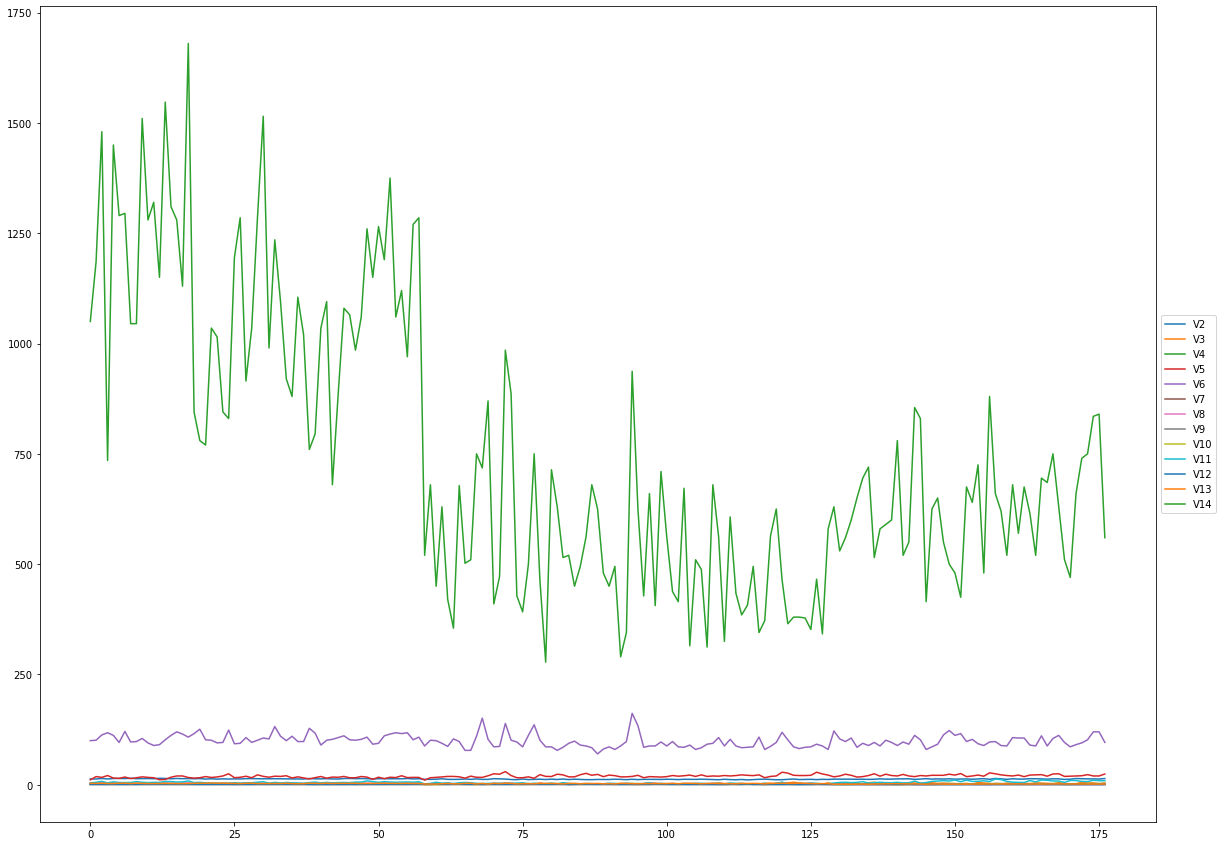

In [52]:
ax = data[["V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

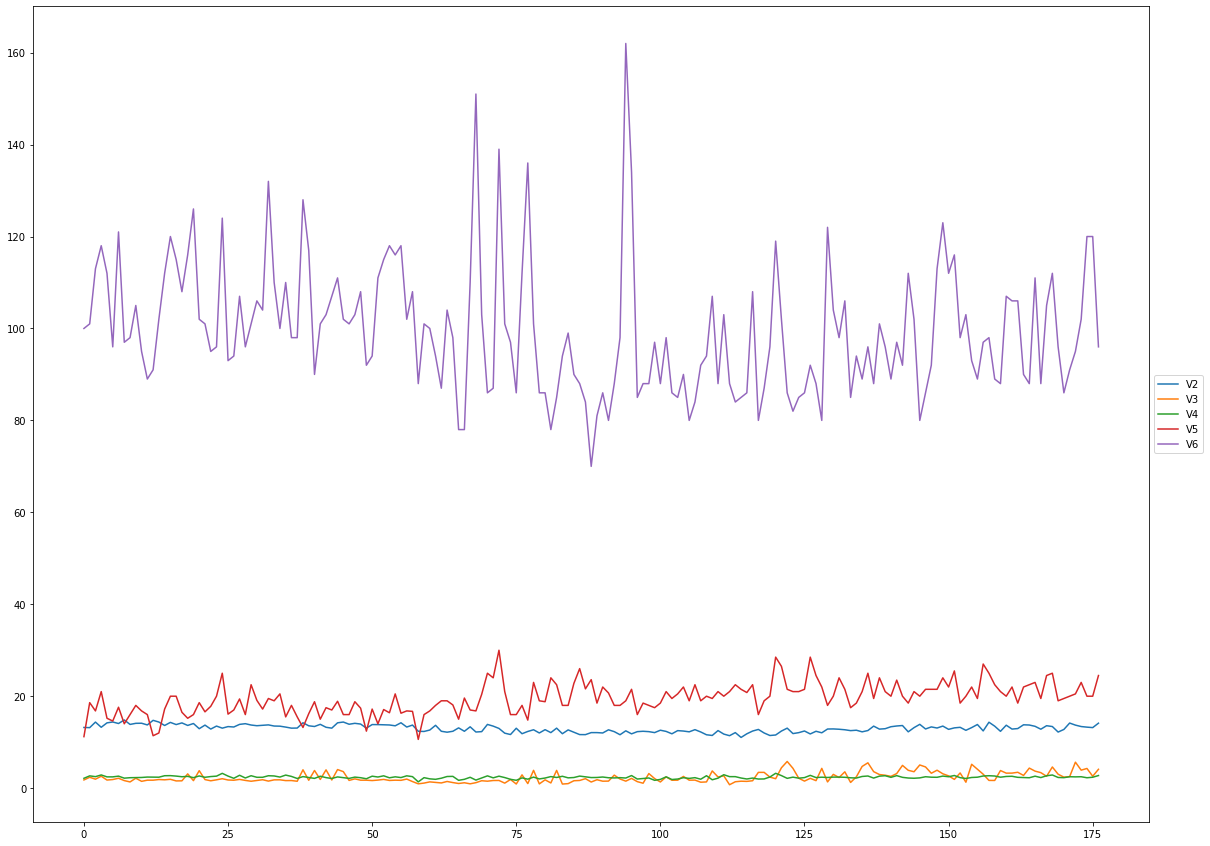

In [53]:
ax = data[["V2","V3","V4","V5","V6"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

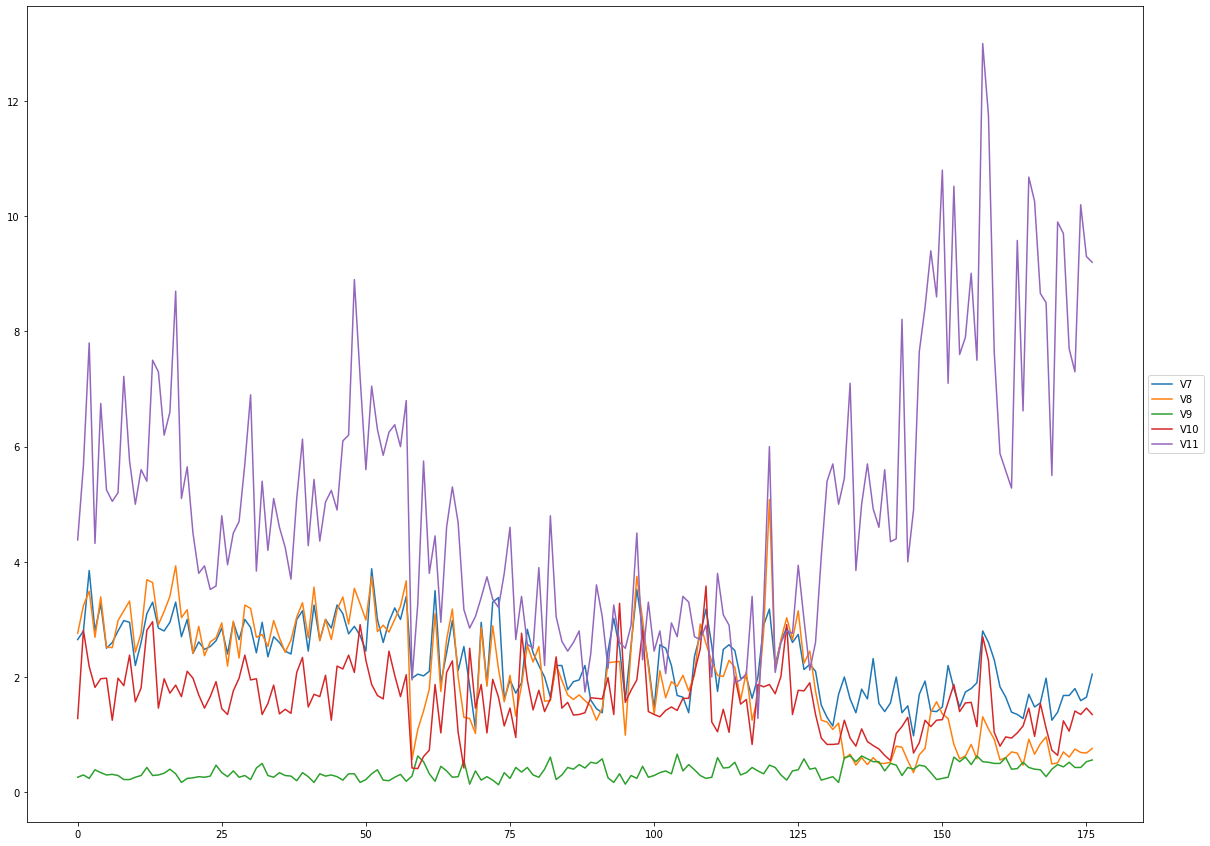

In [54]:
ax = data[["V7","V8","V9","V10","V11"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

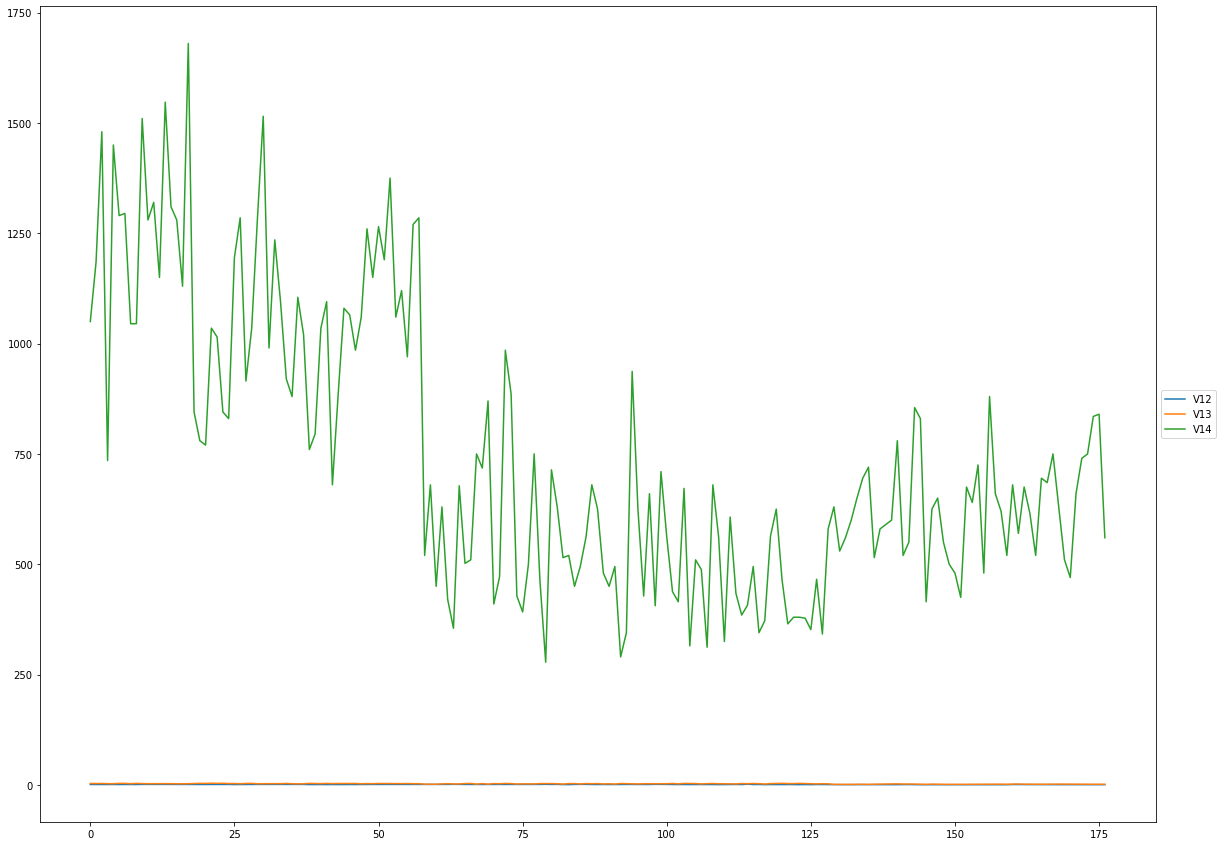

In [55]:
ax = data[["V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

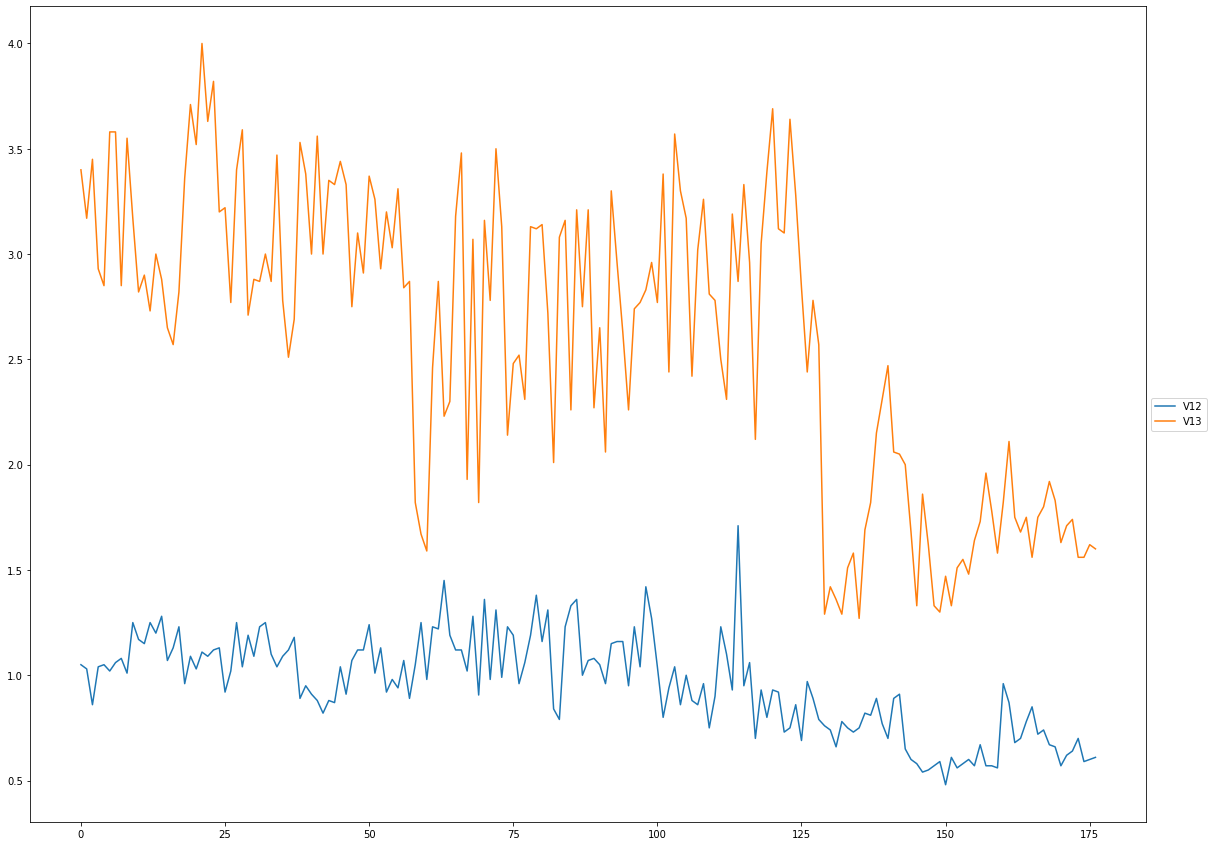

In [56]:
ax = data[["V12","V13"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Calculating Summary Statistics for Multivariate Data

In [57]:
X.apply(np.mean)

V2      12.993672
V3       2.339887
V4       2.366158
V5      19.516949
V6      99.587571
V7       2.292260
V8       2.023446
V9       0.362316
V10      1.586949
V11      5.054802
V12      0.956983
V13      2.604294
V14    745.096045
dtype: float64

In [58]:
X.apply(np.std)

V2       0.806520
V3       1.116148
V4       0.274302
V5       3.326634
V6      14.133922
V7       0.624693
V8       0.995833
V9       0.124300
V10      0.569928
V11      2.317871
V12      0.228487
V13      0.703108
V14    313.993283
dtype: float64

In [59]:
X.apply(np.max)

V2       14.83
V3        5.80
V4        3.23
V5       30.00
V6      162.00
V7        3.88
V8        5.08
V9        0.66
V10       3.58
V11      13.00
V12       1.71
V13       4.00
V14    1680.00
dtype: float64

In [60]:
X.apply(np.min)

V2      11.03
V3       0.74
V4       1.36
V5      10.60
V6      70.00
V7       0.98
V8       0.34
V9       0.13
V10      0.41
V11      1.28
V12      0.48
V13      1.27
V14    278.00
dtype: float64

### Means and Variances Per Group

In [61]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("Means:")
    display(data_groupby.apply(np.mean))
    print("\nStandard deviations:")
    display(data_groupby.apply(np.std))
    print("\nSample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [62]:
printMeanAndSdByGroup(X, y)

Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.457635,0.687396,0.227141,2.539198,10.136128,0.338920,0.397361,0.070037,0.408849,1.238484,0.116446,0.342512,221.418938
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



Sample sizes:


,0
V1,
1,58
2,71
3,48


### Between-groups Covariance and Within-groups Covariance for Two Variables

In [63]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [64]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

0.2882751886766613

In [65]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
   
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)

    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [66]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

-60.70795534741188

### Calculating Correlations for Multivariate Data


In [67]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.18556400432462922
cor:		 0.09996297573855276


In [68]:
corrmat = X.corr()
corrmat

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
V3,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
V4,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
V5,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
V6,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
V7,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
V8,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
V9,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
V10,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731
V11,0.547883,0.250053,0.258643,0.020478,0.199337,-0.056401,-0.174411,0.140192,-0.027112,1.000000,-0.522615,-0.435744,0.315632


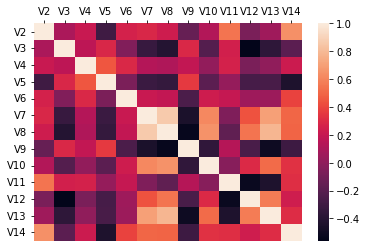

In [69]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

### Hinton diagram
The color of the boxes determines the sign of the correlation,
in this case red for positive and blue for negative correlations; while the size of the boxes determines their
magnitude, the bigger the box the higher the magnitude.

In [70]:
def hinton(matrix, max_weight=None, ax=None):
    ax = ax if ax is not None else plt.gca()
    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
        facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()

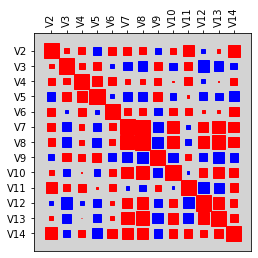

In [71]:
hinton(corrmat)

In [72]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [73]:
standardisedX.apply(np.mean)

V2    -5.218675e-16
V3     2.810056e-16
V4    -3.813647e-16
V5    -2.408619e-16
V6    -8.028731e-17
V7    -2.810056e-16
V8     1.605746e-16
V9    -6.021549e-16
V10   -4.014366e-17
V11    1.806465e-16
V12    6.021549e-16
V13    7.225858e-16
V14    1.605746e-16
dtype: float64

In [74]:
standardisedX.apply(np.std)

V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64

## Principal Component Analysis
The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a
multivariate data set.


In [75]:
pca = PCA().fit(standardisedX)

In [76]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [77]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.162822,0.359831,0.359831
PC2,1.581571,0.192413,0.552244
PC3,1.205541,0.111795,0.664038
PC4,0.961480,0.071111,0.735149
PC5,0.928298,0.066287,0.801437
PC6,0.803024,0.049604,0.851040
PC7,0.742955,0.042460,0.893500
PC8,0.592232,0.026980,0.920480
PC9,0.537755,0.022245,0.942725


In [78]:
summary.sdev

,Standard deviation
PC1,2.162822
PC2,1.581571
PC3,1.205541
PC4,0.961480
PC5,0.928298
PC6,0.803024
PC7,0.742955
PC8,0.592232
PC9,0.537755
PC10,0.496798


In [79]:
np.sum(summary.sdev**2)

Standard deviation    13.0
dtype: float64

### Scatterplots of the Principal Components


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


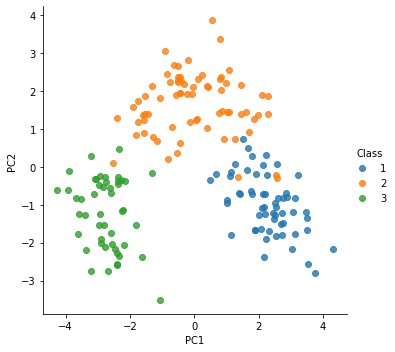

In [80]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

In [87]:
printMeanAndSdByGroup(standardisedX, y)

Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.920878,-0.290306,0.327654,-0.737947,0.452471,0.878195,0.961596,-0.580401,0.536273,0.203453,0.461430,0.768532,1.183115
2,-0.886450,-0.364836,-0.442466,0.216759,-0.356467,-0.053445,0.057639,0.010825,0.076032,-0.849134,0.434592,0.257511,-0.718452
3,0.198479,0.890440,0.258566,0.571063,-0.019462,-0.982098,-1.247186,0.685305,-0.760460,1.010172,-1.200396,-1.309545,-0.366888



Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.567419,0.615865,0.828067,0.763294,0.717149,0.542538,0.399024,0.563448,0.717369,0.534320,0.50964,0.487140,0.705171
2,0.662305,0.903457,1.141944,0.999839,1.176963,0.866837,0.703646,0.990225,1.048927,0.396222,0.88190,0.701263,0.497145
3,0.650559,0.964490,0.666258,0.671704,0.762452,0.565450,0.291646,0.988249,0.709835,0.986571,0.49562,0.382960,0.362721



Sample sizes:


,0
V1,
1,58
2,71
3,48
